In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ncon import ncon

In [3]:
SPECS = dict(np.load("./all_bh_ramps/BH-cubicramp_3_4_10.0_0.1/SPECS.npz"))
print(SPECS)

{'NTUprecision': array(1.e-15), 'NTUprecisionspeed': array(0), 'maxiter': array(50), 'dt': array(0.1), 'd': array(3), 'D': array(4), 'r': array(9), 'tQ': array(0.2)}


In [45]:
env = dict(np.load("./all_bh_ramps/BH-cubicramp_3_4_30.0_0.1/RHOA_2_00004.npz"))
print(list(env))

['rhoA', 'rhoB', 'E_E_A', 'E_E_B', 'E_W_A', 'E_W_B', 'E_S_A', 'E_S_B', 'E_N_A', 'E_N_B', 'C_NW_A', 'C_SW_B', 'C_NE_B', 'C_SE_A', 'C_NW_B', 'C_SW_A', 'C_NE_A', 'C_SE_B', 'error', 'iter', 'dt', 'A', 'B', 'J', 'U', 'names1', 'names2', 'vals1', 'vals2', 'errors1', 'errors2', 'INVprecision', 'CTMRGprecision']


In [78]:
def GetData(d,D,k,chimult):
    data = []
    try:
        SPECS = dict(np.load(f"./all_bh_ramps/BH-cubicramp_{d}_{D}_{k:.1f}_0.1/SPECS.npz"))
        finaliter = int(3/2*SPECS['tQ']/SPECS['dt']+0.0001) + 1
        # print(D,k,"\t\t",int(3/2*SPECS['tQ']/SPECS['dt']+0.0001))
        env = dict(np.load(f"./all_bh_ramps/BH-cubicramp_{d}_{D}_{k:.1f}_0.1/RHOA_{chimult}_{finaliter:05d}.npz"))
    except: raise Exception("aaa")
    for i in range(0,finaliter+1):
        try:
            env = dict(np.load(f"./all_bh_ramps/BH-cubicramp_{d}_{D}_{k:.1f}_0.1/RHOA_{chimult}_{i:05d}.npz"))
        except:
            break
        U,J=env['U'],env['J']
        m = [[env['iter'],env['iter']*env['dt'],0.1*2**(k/10)]]
        # name mean syst_error std_error
        for iter in range(len(env['names1'])):
            m.append([np.real_if_close(np.mean(env['vals1'][iter])), np.real_if_close(np.mean(env['errors1'][iter])), np.real_if_close(np.std(env['vals1'][iter]))])
        for iter in range(len(env['names2'])):
            m.append([np.real_if_close(np.mean(env['vals2'][iter])), np.real_if_close(np.mean(env['errors2'][iter])), np.real_if_close(np.std(env['vals2'][iter]))])
        m = np.array(m)
        M = np.array([[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,1,0],[0,-U/2,U/2,-2*J,-2*J,0],[0,0,0,0,0,1]])
        m = ncon([M,m],([-1,1],[1,-2]))
        data.append(m)
    data = np.array(data)
    return data

In [79]:
d=3
# for D in [10]:
#     for k in [60]:
for D in [4,6,8,10,12,14]:
    for k in [10,20,30,40,50,60,70,80,90,100]:
        chimult=2
        try: drr = GetData(d,D,k,2)
        except: continue
        f = open(f"./BH-cubicramp_{d}_{D}_{k:.1f}_0.1.txt","w")
        for i0 in range(0,drr.shape[0]):
            print(i0,"\t\t",drr[i0,:,:])
            t = i0*0.1 - 3/2*0.1*2**(k/10)
            for i1 in range(0,drr.shape[1]):
                f.write(np.array2string(drr[i0,i1,:])+"\n")
        f.close()
        # for ind in range(0,5):
        #     plt.plot(ts,ind/10000*0+data[:,ind,1].astype(complex)-data[0,ind,1].astype(complex),label=data[0,ind,0]+" - "+data[0,ind,0]+"(t=0)")
        #     plt.legend()

0 		 [[0. +0.j 0. +0.j 0.2+0.j]
 [1. +0.j 0. +0.j 0. +0.j]
 [1. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j]
 [1. +0.j 0. +0.j 0. +0.j]]
1 		 [[ 1.00000000e+00+0.00000000e+00j  1.00000000e-01+0.00000000e+00j
   2.00000000e-01+0.00000000e+00j]
 [ 1.00000000e+00+0.00000000e+00j  1.11022302e-16+0.00000000e+00j
   4.65738890e-14+0.00000000e+00j]
 [ 1.00000149e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   9.31477779e-14+0.00000000e+00j]
 [ 1.21877306e-04+7.15146592e-20j  1.94817578e-19+0.00000000e+00j
   4.36435353e-08+0.00000000e+00j]
 [ 7.43324124e-07+3.80345975e-36j -5.55111512e-17+0.00000000e+00j
   2.32869445e-14+0.00000000e+00j]
 [ 9.99999628e-01+0.00000000e+00j -2.77555756e-17+0.00000000e+00j
   2.66174021e-10+0.00000000e+00j]]
2 		 [[ 2.00000000e+00+0.00000000e+00j  2.00000000e-01+0.00000000e+00j
   2.00000000e-01+0.00000000e+00j]
 [ 1.00000000e+00+0.00000000e+00j -1.66533454e-16+0.00000000e+00j
   4.07707201e-12+0.00000000e+00j]
 [ 1.00007854

/home/jmazur/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


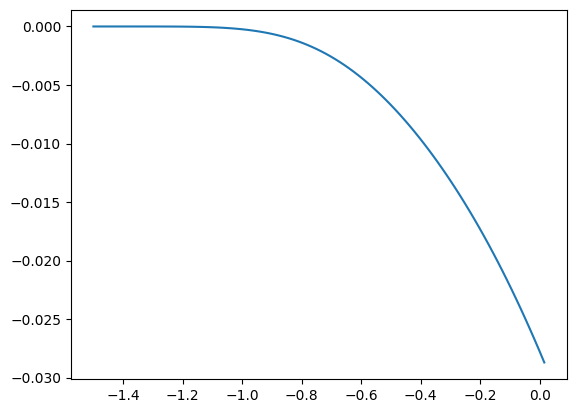

In [80]:
k=60
data = GetData(3, 10, k, 2)
ts = (data[:,0,1] - 3/2*data[0,0,2])/data[0,0,2]
es = data[:,4,0]
plt.plot(ts,es)

In [3]:
d=dict(np.load("./BH-cubicramp/BH-cubicramp_3_4_10_0.1/PEPS_00001.npz"))

In [10]:
list(d)

['GA', 'GB', 'status', 'iter', 'dt', 't', 'J_exact', 'J_average', 'U']

In [2]:
i=1
for i in range(10000000):
    try:
        d=dict(np.load(f"./BH-cubicramp/BH-cubicramp_3_4_20_0.1/PEPS_{i:05d}.npz"))
        print('status' in d)
    except: break

True
True
True
True
True
True
True
True


In [18]:
for i in range(10000000):
    try:
        d1=dict(np.load(f"./BH-cubicramp/BH-cubicramp_3_4_30_0.1/PEPS_{i:05d}.npz"))
        d2=dict(np.load(f"./alldata/BH-cubicramp_3_4_30.0_0.1/PEPS_{i:05d}.npz"))
        print(np.linalg.norm(d1['A']/np.linalg.norm(d1['A'])-d2['A']/np.linalg.norm(d2['A'])))
    except: break

0.0
0.0
0.0
0.0
0.0
0.0
1.981798023021594
0.42778346815649626
1.9572680851856143
1.9315741885012456
1.8870961212191064
1.909895707362986
1.824528833497876
1.8444461856740588


In [19]:
d1

{'status': array('done', dtype='<U4'),
 'A': array([[[[[ 9.89902936e-11+4.06818869e-10j,
            -8.50405064e-01-1.79868885e-03j,
             2.85257014e-10+4.11300146e-10j],
           [-1.42607206e-01-6.78653892e-02j,
             2.72445341e-09+6.48646172e-09j,
             8.60472042e-02-1.16595464e-02j],
           [-4.48764858e-02+7.35956883e-02j,
             1.32261118e-09-3.71200985e-09j,
             4.97169611e-03+1.59039694e-01j],
           [ 2.53638629e-04+7.46696783e-05j,
            -1.93645055e-09-6.24571612e-09j,
             5.49730354e-03-2.59849130e-04j]],
 
          [[-1.13211534e-01-1.39038615e-01j,
             1.60899009e-09+6.69627209e-09j,
            -1.66739228e-02+7.92726231e-03j],
           [-2.11407442e-09+2.49285720e-09j,
             7.78362003e-03+1.54214523e-02j,
             1.57207015e-10-8.72650425e-10j],
           [ 1.45611905e-09+7.81950042e-10j,
            -3.21951196e-02+1.98354041e-02j,
             1.81922960e-09-9.41658832e-11j],
 

In [20]:
d2

{'A': array([[[[[ 3.63333162e-10-3.87642020e-11j,
             8.48499893e-01+1.87223365e-03j,
            -7.32348110e-10+1.29698243e-10j],
           [-7.53331422e-02-1.42515111e-01j,
            -5.66638812e-11+4.81828514e-09j,
             6.94440640e-02+4.45229011e-02j],
           [-6.60161819e-02+4.84480168e-02j,
            -9.57996386e-10-1.66735790e-09j,
            -6.67143422e-02+1.48079489e-01j],
           [-1.63972299e-04+1.85075233e-04j,
            -1.09972049e-08+6.75668929e-10j,
            -2.02175425e-03+5.27042966e-03j]],
 
          [[-3.07437683e-02-1.77627419e-01j,
            -1.90181200e-09+7.56241552e-09j,
            -1.76932619e-02-3.50241680e-05j],
           [ 2.51469752e-09-1.75299594e-09j,
             1.18064648e-02-1.20915787e-02j,
            -1.07754014e-10+1.31633514e-09j],
           [-1.61092692e-09-7.40579760e-10j,
             3.52575971e-02+1.56565885e-02j,
            -2.31830861e-09-2.36948035e-10j],
           [ 1.08156665e-08+5.31080757e-